In [1]:
import torch

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [90]:
X_train = np.array([[1.1], [2.2], [3.3], [4.4], [5.5], [6.5], [7.2], [8.8], [9.4], [10.6]], dtype=np.float32)
X_train

array([[ 1.1],
       [ 2.2],
       [ 3.3],
       [ 4.4],
       [ 5.5],
       [ 6.5],
       [ 7.2],
       [ 8.8],
       [ 9.4],
       [10.6]], dtype=float32)

In [91]:
X_test = np.array([[1.0], [2.0], [3.0], [4.0], [5.0]], dtype=np.float32)
X_test

array([[1.],
       [2.],
       [3.],
       [4.],
       [5.]], dtype=float32)

In [92]:
Y_train = np.array([[2.2], [3.5], [4.7], [5.9], [6.3], [7.4], [8.1], [9.7], [10.5], [11.7]], dtype=np.float32)
Y_train

array([[ 2.2],
       [ 3.5],
       [ 4.7],
       [ 5.9],
       [ 6.3],
       [ 7.4],
       [ 8.1],
       [ 9.7],
       [10.5],
       [11.7]], dtype=float32)

In [93]:
Y_test = np.array([[2.0, 3.0, 4.0, 5.0, 6.0]], dtype=np.float32)
Y_test

array([[2., 3., 4., 5., 6.]], dtype=float32)

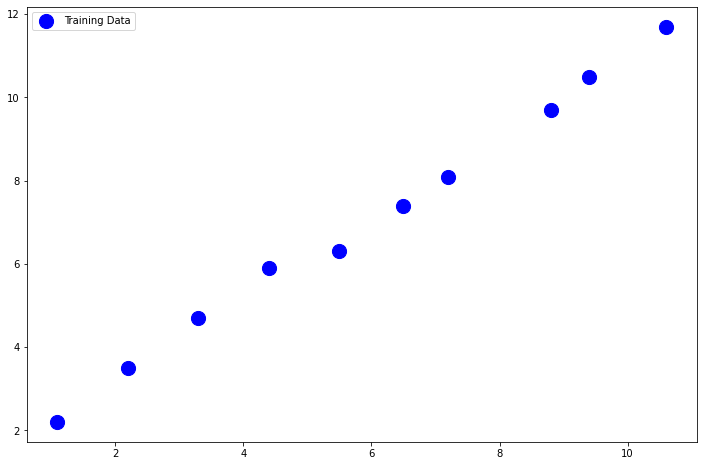

In [94]:
plt.figure(figsize= (12,8))

plt.scatter(X_train, Y_train, label="Training Data", c="b", s=200)

plt.legend()
plt.show()

### Network starts here

In [95]:
X_train = torch.from_numpy(X_train)
Y_train = torch.from_numpy(Y_train)

print(X_train.requires_grad)
print(Y_train.requires_grad)

False
False


In [96]:
input_size = 1
output_size = 1
hidden_size = 1

In [97]:
W = torch.rand(input_size, hidden_size, requires_grad = True)
W

tensor([[0.5233]], requires_grad=True)

In [98]:
B = torch.rand(input_size, hidden_size, requires_grad = True)
B

tensor([[0.7293]], requires_grad=True)

In [106]:
learning_rate = 1e-6
num_epochs = 10000

In [107]:
for iter in range(1, num_epochs + 1):
    Y_pred = X_train.mm(W).add(B)
    loss = (Y_pred-Y_train).pow(2).sum()
    
    if iter % 50 == 0:
        print(iter, loss.item())
    
    loss.backward()
    
    with torch.no_grad():
        W -= learning_rate * W.grad
        B -= learning_rate * B.grad
        W.grad.zero_()
        B.grad.zero_()

50 19.100982666015625
100 17.54468536376953
150 16.121442794799805
200 14.819890022277832
250 13.629629135131836
300 12.541141510009766
350 11.545698165893555
400 10.635348320007324
450 9.802864074707031
500 9.041550636291504
550 8.345316886901855
600 7.708615303039551
650 7.126338481903076
700 6.593848705291748
750 6.106860160827637
800 5.661505222320557
850 5.2542219161987305
900 4.881748199462891
950 4.541102409362793
1000 4.22957181930542
1050 3.944666862487793
1100 3.684100389480591
1150 3.445815324783325
1200 3.227883815765381
1250 3.02856707572937
1300 2.8462767601013184
1350 2.6795620918273926
1400 2.5270822048187256
1450 2.3876235485076904
1500 2.2600669860839844
1550 2.1434078216552734
1600 2.036710500717163
1650 1.9391169548034668
1700 1.8498516082763672
1750 1.76820707321167
1800 1.693523645401001
1850 1.6252087354660034
1900 1.5627217292785645
1950 1.505563497543335
2000 1.4532740116119385
2050 1.4054380655288696
2100 1.361676573753357
2150 1.3216397762298584
2200 1.285017

In [108]:
print(W)
print(B)

tensor([[1.0312]], requires_grad=True)
tensor([[0.8199]], requires_grad=True)


In [109]:
X_test_tensor = torch.from_numpy(X_test)
X_test_tensor

tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])

In [110]:
predicted_tensor = X_test_tensor.mm(W).add(B)
predicted_tensor

tensor([[1.8510],
        [2.8822],
        [3.9133],
        [4.9445],
        [5.9756]], grad_fn=<AddBackward0>)

### detach() creates a view on top of the tensor where gradients are not required

In [111]:
predicted = predicted_tensor.detach().numpy()
predicted

array([[1.8510299],
       [2.8821814],
       [3.913333 ],
       [4.9444847],
       [5.9756365]], dtype=float32)

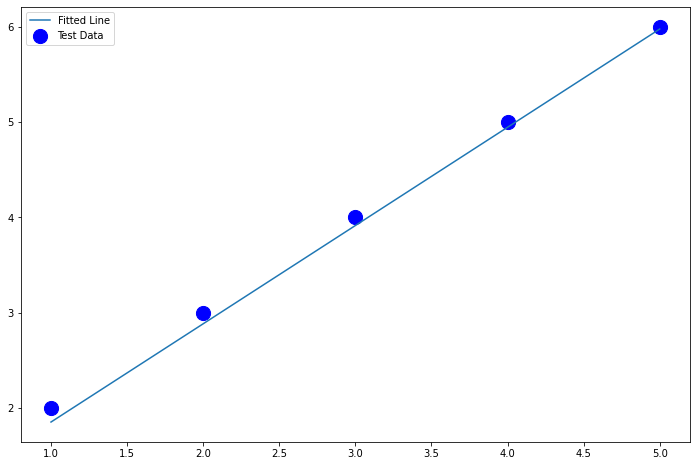

In [112]:
plt.figure(figsize= (12,8))

plt.scatter(X_test, Y_test, label="Test Data", c="b", s=200)
plt.plot(X_test, predicted, label="Fitted Line")

plt.legend()
plt.show()